## 회귀 - 당뇨병

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
seed = 2023
np.random.seed(seed)
tf.random.set_seed(seed)

- 데이터 전처리

In [31]:
from sklearn.datasets import load_diabetes
diabetes=load_diabetes()
diabetes.data.shape

(442, 10)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    diabetes.data, diabetes.target, test_size=0.2, random_state=seed
)

- 모델 정의 / 설정/ 학습/ 평가

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [34]:
model = Sequential([
    Dense(24, input_dim=10, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1)                      # 회귀에서는 출력층에 활성화 함수를 사용하지 않음       
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 24)                264       
                                                                 
 dense_13 (Dense)            (None, 10)                250       
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 525 (2.05 KB)
Trainable params: 525 (2.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
# 회귀 실행에서는 Metrics사용하지 않음
model.compile(optimizer='rmsprop', loss='mean_squared_error')

In [43]:
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=2000, batch_size=100, verbose=0)

In [44]:
# 평가
pred = model.predict(X_test)

3/3 [==============================] - 0s 2ms/step


In [45]:
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.4951123360563634

In [46]:
import pandas as pd
df = pd.DataFrame({'y_test':y_test, 'pred':pred.flatten()})
df.head()


,y_test,pred
0,265.0,158.960587
1,261.0,234.163895
2,160.0,103.376266
3,249.0,203.057098
4,102.0,101.220100


In [47]:
y_loss = hist.history['loss']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_loss)+1)

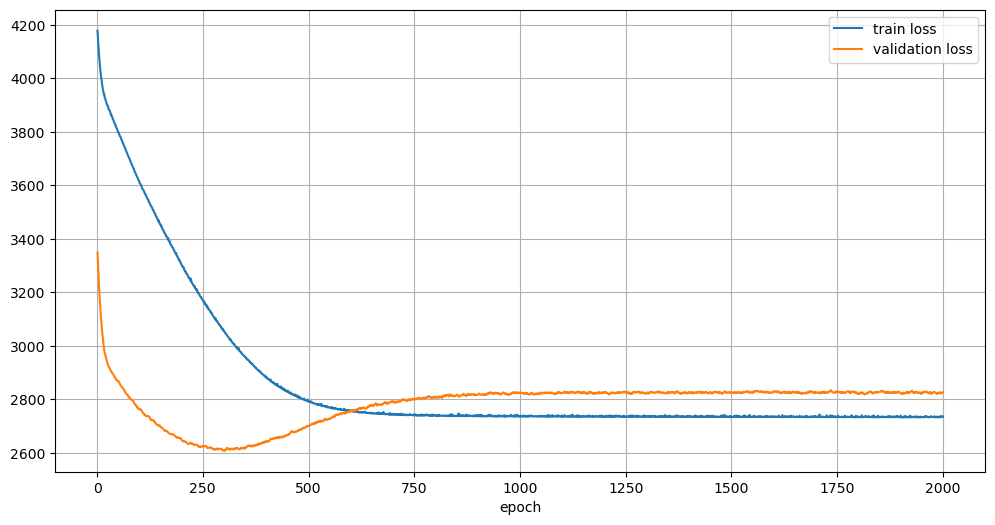

In [48]:
plt.figure(figsize=(12,6))
plt.plot(xs, y_loss, label='train loss')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend(), plt.grid(), plt.xlabel('epoch')
plt.show()